In [1]:
# Load a local copy of the current ODYM branch:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit

In [2]:
# Loading data
model_inflows = np.load('inflow_array.npy')
data_inflows = pd.read_excel('pc_sales_2019(1)_OICA.xlsx', skiprows=5)

In [3]:
data_inflows.head()

,REGIONS/COUNTRIES,Unnamed: 1,Unnamed: 2,Unnamed: 3,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUROPE,NaN,NaN,NaN,17906455.0,18685556.0,19618588.0,18821599.0,16608761.0,16499863.0,17167600.0,16191269.0,15942273.0,16154279.0,16410563.0,17291819.0,17974281,17909677.0,17972774.0
2,EU 28 countries + EFTA,NaN,NaN,NaN,15622035.0,15961138.0,16147274.0,14911880.0,14533115.0,13830694.0,13642659.0,12567903.0,12344415.0,13061461.0,14287881.0,15160239.0,15631283,15636484.0,15819949.0
3,EU 15 countries + EFTA,NaN,NaN,NaN,14565695.0,14820182.0,14842186.0,13602038.0,13668808.0,12984549.0,12815435.0,11773281.0,11555153.0,12148648.0,13261258.0,13971468.0,14320223,14210162.0,14308239.0
4,AUSTRIA,NaN,NaN,NaN,307915.0,308594.0,298182.0,293697.0,319403.0,328563.0,356145.0,336010.0,319035.0,303318.0,308555.0,329604.0,353320,341068.0,329363.0


In [4]:
# Let's have a loow at the regions available
data_inflows['REGIONS/COUNTRIES'].unique()

array([nan, 'EUROPE', 'EU 28 countries + EFTA', 'EU 15 countries + EFTA',
       'AUSTRIA', 'BELGIUM', 'DENMARK', 'FINLAND', 'FRANCE', 'GERMANY',
       'GREECE', 'ICELAND', 'IRELAND', 'ITALY', 'LUXEMBOURG',
       'NETHERLANDS', 'NORWAY', 'PORTUGAL', 'SPAIN', 'SWEDEN',
       'SWITZERLAND (+FL)', 'UNITED KINGDOM', 'EUROPE NEW MEMBERS',
       'BULGARIA*', 'CROATIA', 'CYPRUS', 'CZECH REPUBLIC', 'ESTONIA',
       'HUNGARY', 'LATVIA', 'LITHUANIA', 'MALTA', 'POLAND', 'ROMANIA',
       'SLOVAKIA', 'SLOVENIA', 'RUSSIA, TURKEY & OTHER EUROPE', 'ALBANIA',
       'ARMENIA', 'BELARUS', 'BOSNIA', 'GEORGIA', 'MACEDONIA', 'MOLDAVIA',
       'RUSSIA', 'SERBIA', 'TURKEY', 'UKRAINE', 'AMERICA', 'NAFTA',
       'CANADA', 'MEXICO', 'UNITED STATES OF AMERICA',
       'CENTRAL & SOUTH AMERICA', 'ARGENTINA', 'BAHAMAS', 'BELIZE',
       'BOLIVIA', 'BRAZIL', 'CHILE', 'COLOMBIA', 'COSTA RICA', 'CUBA',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EL SALVADOR', 'GUADELOUPE',
       'GUATEMALA', 'GUIANA', 'HONDURAS

In [5]:
# Let's pick the global sales
data_world = data_inflows[data_inflows['REGIONS/COUNTRIES']=='ALL COUNTRIES']

In [6]:
data_world.head()

,REGIONS/COUNTRIES,Unnamed: 1,Unnamed: 2,Unnamed: 3,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
159,ALL COUNTRIES,NaN,NaN,NaN,45407298.0,47955259.0,50834531.0,49978237.0,49654985.0,55818570.0,57839953.0,60936407.0,63429200.0,65708230.0,66314155.0,6.946443e+07,70694834,68678212.0,64341693.0


In [7]:
# Let's put the data in a more useful shape
data_world = data_world.melt()
data_world.dropna(inplace=True)
data_world.drop(index=0, inplace=True)
data_world.rename(columns={'variable': 'year'}, inplace=True)

In [8]:
data_world.tail()

,year,value
14,2015,6.63142e+07
15,2016,6.94644e+07
16,2017,70694834
17,2018,6.86782e+07
18,2019,6.43417e+07


## Now we can begin the validation steps

In [9]:
model_inflows.shape # This array contains the 3 vehicle stock development scenarios, 3 EV penetration scenarios, 1 region, and 101 years (from 1950 to 2050)

(3, 3, 1, 101)

In [10]:
model_past = model_inflows[:,:,:,55:70]

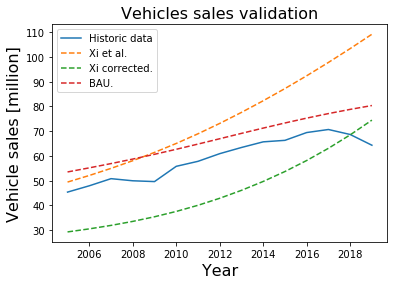

In [11]:
fig, ax = plt.subplots()
ax.plot(data_world.year.values.astype(int), 
            data_world.value.values/1000000) 
# Plot each scenario
for s in range(3):
    ax.plot(data_world.year.values.astype(int), 
            model_past[s,0,0,:]/1000, '--') 
    ax.legend(['Historic data', 'Xi et al.', 'Xi corrected.', 'BAU.'], loc='best',prop={'size':10})
    ax.set_ylabel('Vehicle sales [million]',fontsize =16)
    ax.set_title('Vehicles sales validation', fontsize=16)
    ax.set_xlabel('Year',fontsize =16)

## Looks like the sales are being overestimated, what can we do about this?